<h1 style="text-align: center;">Introduction to Modern Mathematical Modeling with R:</h1>
<h2 style="text-align: center;">A User's Manual to Train Mathematical Consultants<br></h2>

<h3 style="text-align: center;">A Cambridge University Press book</h3>
<h3 style="text-align: center;">by SSP Shen<br><br></h3>

<p style="text-align: center;">Compiled and Edited by Joaquin Stawsky</p>
<p style="text-align: center;">Momtaza Sayd Contributed to this Version of the Code</p>
<p style="text-align: center;">San Diego State University, August 2024</p>

## Chapter 8: Stochastic Models
### A Nowhere Differentiable but Everywhere Continuous Model

In [31]:
import numpy as np
import numpy.random as rando
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [32]:
a = 0.5
b = 13
m = 10_000
n = 100

t = np.linspace(-2, 2, m)

weier = np.zeros(t.size)
for i in range(n):
    weier += (a**i)*np.cos((b**i)*np.pi*t)

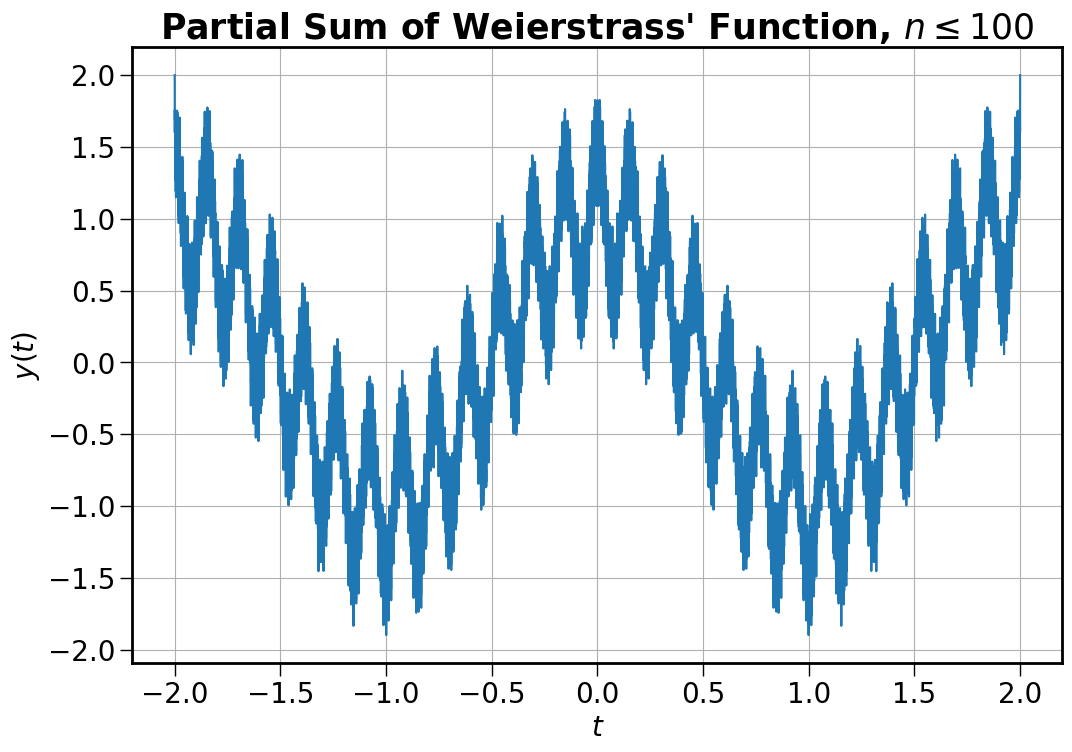

In [33]:
fig, ax = plt.subplots(1, 1)
ax.plot(t, weier)
ax.set_ylabel("$y(t)$", size=20)
ax.set_xlabel("$t$", size=20)
ax.tick_params(labelsize=20)
ax.set_title("Partial Sum of Weierstrass' Function, $n \leq 100$", 
             size=25,fontweight="bold");
ax.grid()

#plt.savefig("PartialSumofWeierstrassFunction.jpg")

In [34]:
dis = np.cumsum(rando.normal(size=(1_000,1)))
xdis = rando.normal(size=(50,1))
ydis = rando.normal(size=(50,1))

arrows = [patches.Arrow(xdis[i,0], ydis[i,0], xdis[i+1,0], ydis[i+1,0], width=.01)
          for i in range(xdis.shape[0]-1)]

/var/folders/39/gz34bb2s7nx_655183dd5fgc0000gn/T/ipykernel_3277/656346317.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-^" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(np.cumsum(xdis), np.cumsum(ydis), 'k-^',color='red')


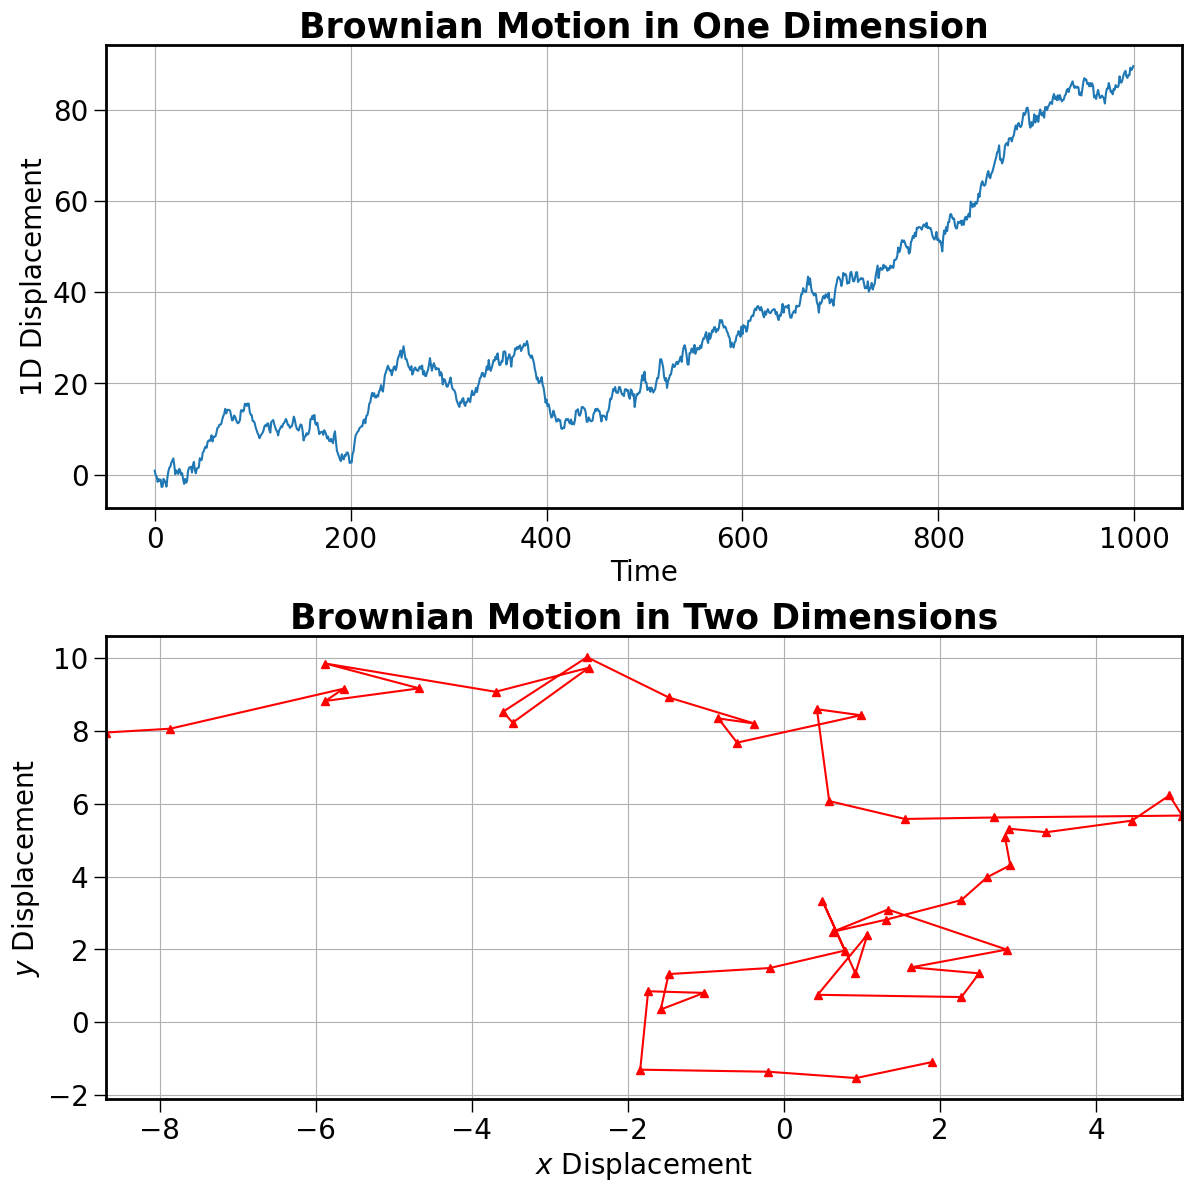

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(12,12))

ax[0].plot(dis)
ax[0].set_ylabel("1D Displacement", size=20)
ax[0].set_xlabel("Time", size=20)
ax[0].tick_params(labelsize=20)
ax[0].set_title("Brownian Motion in One Dimension", 
                size=25,fontweight="bold")
ax[0].grid()

ax[1].plot(np.cumsum(xdis), np.cumsum(ydis), 'k-^',color='red')
ax[1].set_ylabel("$y$ Displacement", size=20)
ax[1].set_xlabel("$x$ Displacement", size=20)
ax[1].tick_params(labelsize=20)
ax[1].set_title("Brownian Motion in Two Dimensions", 
                size=25,fontweight="bold")
ax[1].set_xlim(np.cumsum(xdis).min(), np.cumsum(xdis).max())
ax[1].grid()

fig.tight_layout(pad=1)

#plt.savefig("BrownianMotionDemo.jpg")

In [36]:
dis = rando.normal(size=(1_000,1))
at = rando.poisson(lam=1, size=(1_000,1))
select = np.where(at != 0)[0]
dis[select] = dis[select]*at[select]

cumulativeDis = np.cumsum(dis)

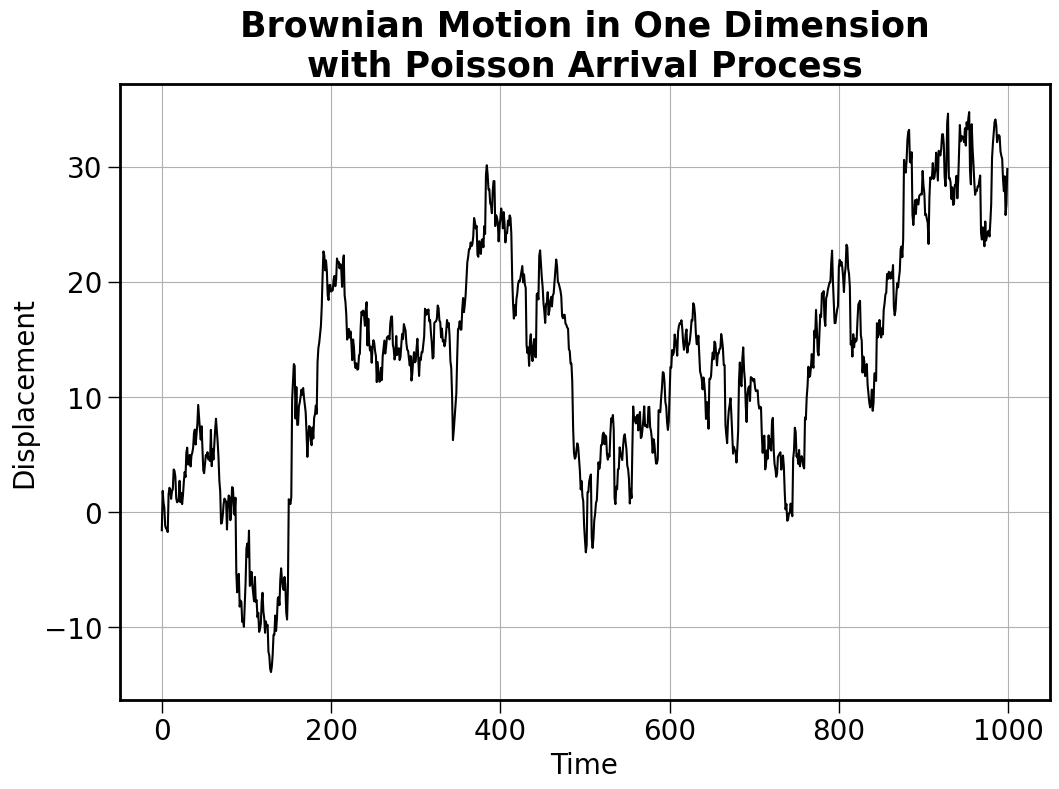

In [37]:
fig, ax = plt.subplots(1, 1)

ax.plot(cumulativeDis, '-k')
ax.set_xlabel("Time", size=20)
ax.set_ylabel("Displacement", size=20)
ax.tick_params(labelsize=20)
ax.set_title("Brownian Motion in One Dimension\nwith Poisson Arrival Process",
             size=25,fontweight="bold");
ax.grid()

plt.savefig("1DBrownianMotionPoissonArrival.jpg")

In [38]:
xdis = rando.normal(size=(1_000,1))
ydis = rando.normal(size=(1_000,1))

at = rando.poisson(lam=1, size=(1_000,1))
select = np.where(at != 0)[0]

xdis[select] = xdis[select]*at[select]
ydis[select] = ydis[select]*at[select]

cumulativexDis = np.cumsum(xdis)
cumulativeyDis = np.cumsum(ydis)

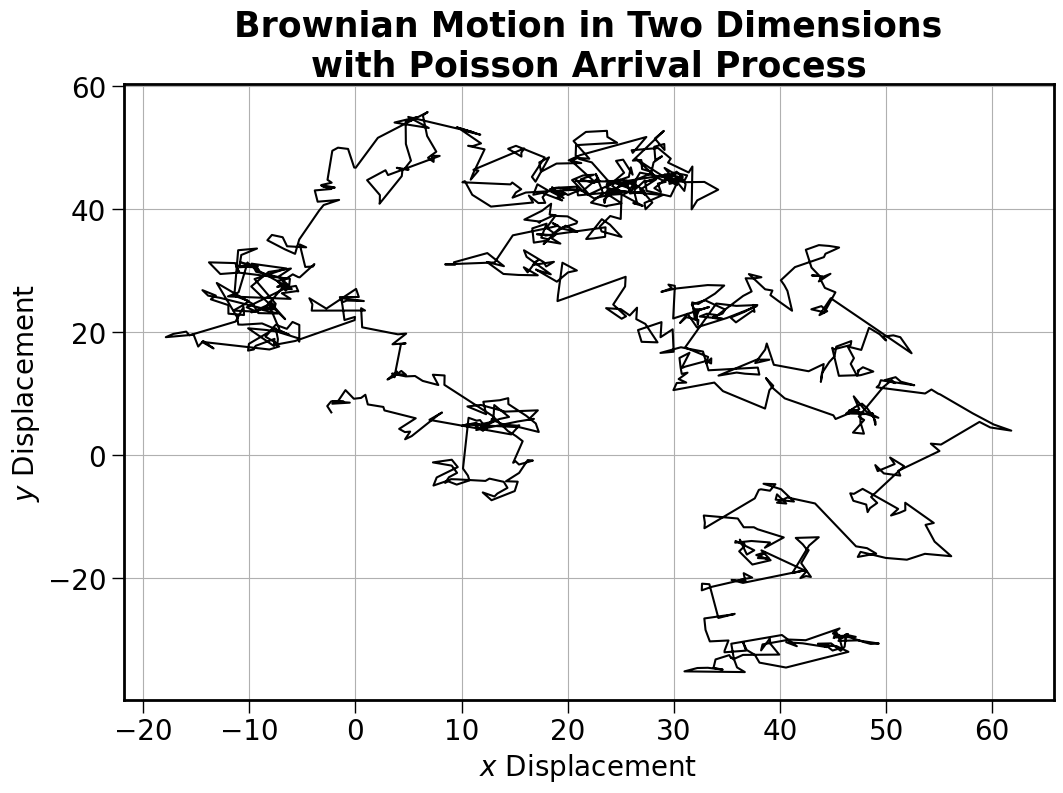

In [39]:
fig, ax = plt.subplots(1, 1)

ax.plot(cumulativexDis, cumulativeyDis, '-k')
ax.set_xlabel("$x$ Displacement", size=20)
ax.set_ylabel("$y$ Displacement", size=20)
ax.tick_params(labelsize=20)
ax.set_title("Brownian Motion in Two Dimensions\nwith Poisson Arrival Process", 
             size=25,fontweight="bold");
ax.grid()

#plt.savefig("2DBrownianMotionPoissonArrival.jpg")